#  1. Cargar datos

In [76]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("berkeleyearth/climate-change-earth-surface-temperature-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/climate-change-earth-surface-temperature-data


Siendo que se contiene en ese path diferentes archivos referentes a que tan especifico quiere hacer su análisis con nivel nacional, ciudad o global. Se elige el dataset referentes a ciudades importantes.

In [77]:
import pandas as pd
df = pd.read_csv(path + "/GlobalLandTemperaturesByCity.csv")
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


#2. Elegir Ciudades a analizar mediante su nivel de valores nulos

Para poder lograr una visualización de las tendencias climáticas, se usa mayormente 5 o más años para entender y ver claramente las tendencias a subir.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [79]:
rows_nan = df[df.isna().any(axis=1)]

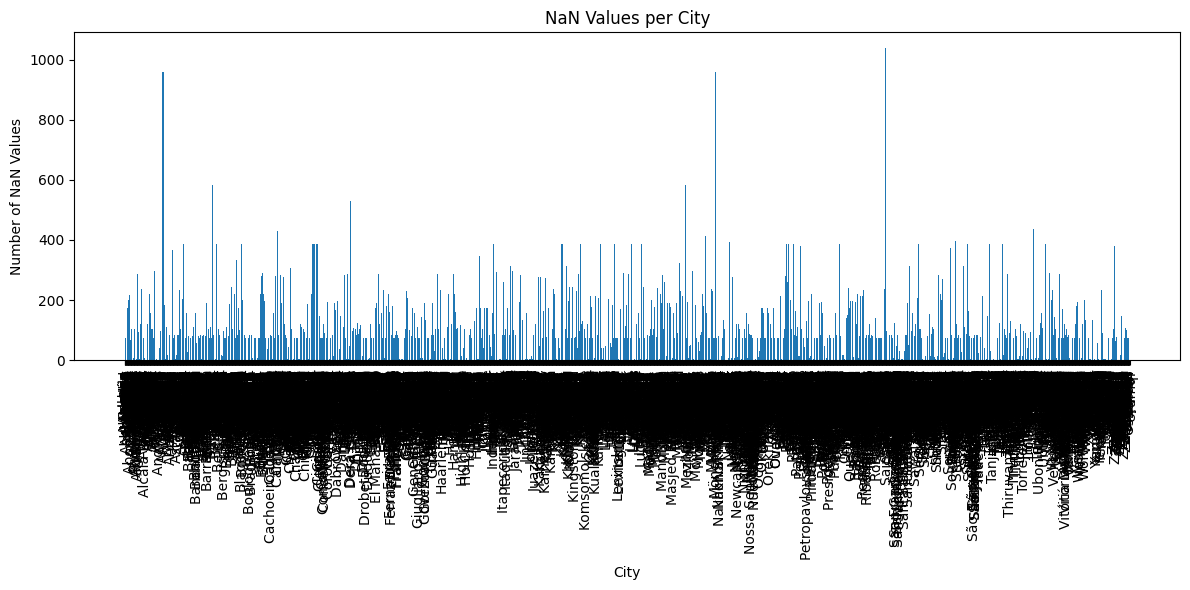

In [80]:
# prompt: Create a bar graph for each city that counts the number of NaN values

import matplotlib.pyplot as plt

# Group by city and count NaN values
nan_counts = rows_nan.groupby('City')['AverageTemperature'].apply(lambda x: x.isna().sum())

# Create the bar graph
plt.figure(figsize=(12, 6))
plt.bar(nan_counts.index, nan_counts.values)
plt.xlabel("City")
plt.ylabel("Number of NaN Values")
plt.title("NaN Values per City")
plt.xticks(rotation=90)  # Rotate city names for better readability
plt.tight_layout()
plt.show()


Para facilitar el procesamiento, dado que involucraria la eliminación o imputación de datos para varios datos, y análisis de los datos, se excluyen las ciudades que se encuentran en la gráfica anterior.

## Excluir Ciudades con Datos Faltantes

In [81]:
cities_to_exclude = nan_counts.index
df_filtered = df[~df['City'].isin(cities_to_exclude)]
df_filtered


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
274252,1849-01-01,13.116,2.586,Anaheim,United States,32.95N,117.77W
274253,1849-02-01,12.656,1.882,Anaheim,United States,32.95N,117.77W
274254,1849-03-01,13.551,2.035,Anaheim,United States,32.95N,117.77W
274255,1849-04-01,14.146,2.805,Anaheim,United States,32.95N,117.77W
274256,1849-05-01,13.543,1.882,Anaheim,United States,32.95N,117.77W
...,...,...,...,...,...,...,...
8472465,2013-05-01,19.800,0.379,Zacatecas,Mexico,23.31N,102.23W
8472466,2013-06-01,20.594,0.416,Zacatecas,Mexico,23.31N,102.23W
8472467,2013-07-01,18.957,0.552,Zacatecas,Mexico,23.31N,102.23W
8472468,2013-08-01,18.987,0.433,Zacatecas,Mexico,23.31N,102.23W


## Acotar Series de tiempo

In [82]:
#Se acota la serie de tiempo en los últ#Se acota la serie de tiempo en los últimos 20 años registrados.
start_date = '1993-01-01'
end_date = '2013-01-01'
df_filtered_constrained = df_filtered[(df_filtered['dt'] >= start_date) & (df_filtered['dt'] <= end_date)]
df_filtered_constrained

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
275980,1993-01-01,13.685,0.433,Anaheim,United States,32.95N,117.77W
275981,1993-02-01,13.529,0.328,Anaheim,United States,32.95N,117.77W
275982,1993-03-01,15.458,0.241,Anaheim,United States,32.95N,117.77W
275983,1993-04-01,16.066,0.235,Anaheim,United States,32.95N,117.77W
275984,1993-05-01,17.318,0.260,Anaheim,United States,32.95N,117.77W
...,...,...,...,...,...,...,...
8472457,2012-09-01,17.839,0.384,Zacatecas,Mexico,23.31N,102.23W
8472458,2012-10-01,17.368,1.083,Zacatecas,Mexico,23.31N,102.23W
8472459,2012-11-01,14.217,0.880,Zacatecas,Mexico,23.31N,102.23W
8472460,2012-12-01,12.724,0.497,Zacatecas,Mexico,23.31N,102.23W


In [83]:
df_filtered_constrained['City'].value_counts() #Debería de tenerse 241 por default.

,count
City,
Manzanillo,482
Pasadena,482
Santa Clara,482
Antioch,241
Anaheim,241
...,...
Waco,241
West Covina,241
Wichita Falls,241


In [84]:
df_filtered_constrained[df_filtered_constrained['City'] == 'Manzanillo']#Para no confundir ciudades en diferentes paises no se toman en cuenta

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4623785,1993-01-01,24.497,0.427,Manzanillo,Cuba,20.09N,76.78W
4623786,1993-02-01,23.965,0.538,Manzanillo,Cuba,20.09N,76.78W
4623787,1993-03-01,25.140,0.344,Manzanillo,Cuba,20.09N,76.78W
4623788,1993-04-01,25.801,0.300,Manzanillo,Cuba,20.09N,76.78W
4623789,1993-05-01,26.721,0.363,Manzanillo,Cuba,20.09N,76.78W
...,...,...,...,...,...,...,...
4625998,2012-09-01,29.341,0.484,Manzanillo,Mexico,18.48N,104.79W
4625999,2012-10-01,29.725,0.620,Manzanillo,Mexico,18.48N,104.79W
4626000,2012-11-01,29.207,0.575,Manzanillo,Mexico,18.48N,104.79W
4626001,2012-12-01,27.949,0.716,Manzanillo,Mexico,18.48N,104.79W


## Quitar Ciudades dobles

In [85]:
double_cities = ['Manzanillo','Pasadena','Santa Clara']
df_filtered_constrained = df_filtered_constrained[~df_filtered_constrained['City'].isin(double_cities)]
df_filtered_constrained

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
275980,1993-01-01,13.685,0.433,Anaheim,United States,32.95N,117.77W
275981,1993-02-01,13.529,0.328,Anaheim,United States,32.95N,117.77W
275982,1993-03-01,15.458,0.241,Anaheim,United States,32.95N,117.77W
275983,1993-04-01,16.066,0.235,Anaheim,United States,32.95N,117.77W
275984,1993-05-01,17.318,0.260,Anaheim,United States,32.95N,117.77W
...,...,...,...,...,...,...,...
8472457,2012-09-01,17.839,0.384,Zacatecas,Mexico,23.31N,102.23W
8472458,2012-10-01,17.368,1.083,Zacatecas,Mexico,23.31N,102.23W
8472459,2012-11-01,14.217,0.880,Zacatecas,Mexico,23.31N,102.23W
8472460,2012-12-01,12.724,0.497,Zacatecas,Mexico,23.31N,102.23W


In [86]:
import plotly.express as px

# Assuming df_filtered is already defined and contains 'City', 'Latitude', and 'Longitude' columns.
# If not, replace with the actual column names.
def convert_coord(coord):
    if isinstance(coord, str):
        if coord[-1] in ['N', 'E']:
            return float(coord[:-1])
        elif coord[-1] in ['S', 'W']:
            return -float(coord[:-1])
    return float(coord)  # in case it's already numeric

# Apply to DataFrame columns
df_filtered_graph = df_filtered_constrained.copy()
df_filtered_graph['Latitude'] = df_filtered_graph['Latitude'].apply(convert_coord)
df_filtered_graph['Longitude'] = df_filtered_graph['Longitude'].apply(convert_coord)

fig = px.scatter_geo(df_filtered_graph,
                     lat='Latitude',
                     lon='Longitude',
                     hover_name='City',
                     color='City', # Color points by city
                     projection="natural earth")
fig.show()


In [87]:
# Ciudades Costales (cerca de Costa) : Ensenada, Tijuana, Beaumont, Lafayette, Mérida, Cancún, Pinar del Rio, Matanzas, Cienfuegos, Sancti Spiritus, Las Tunas, Palma Soriano, Santiago de Cuba

<ipython-input-88-e48571f5ae9d>:25: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



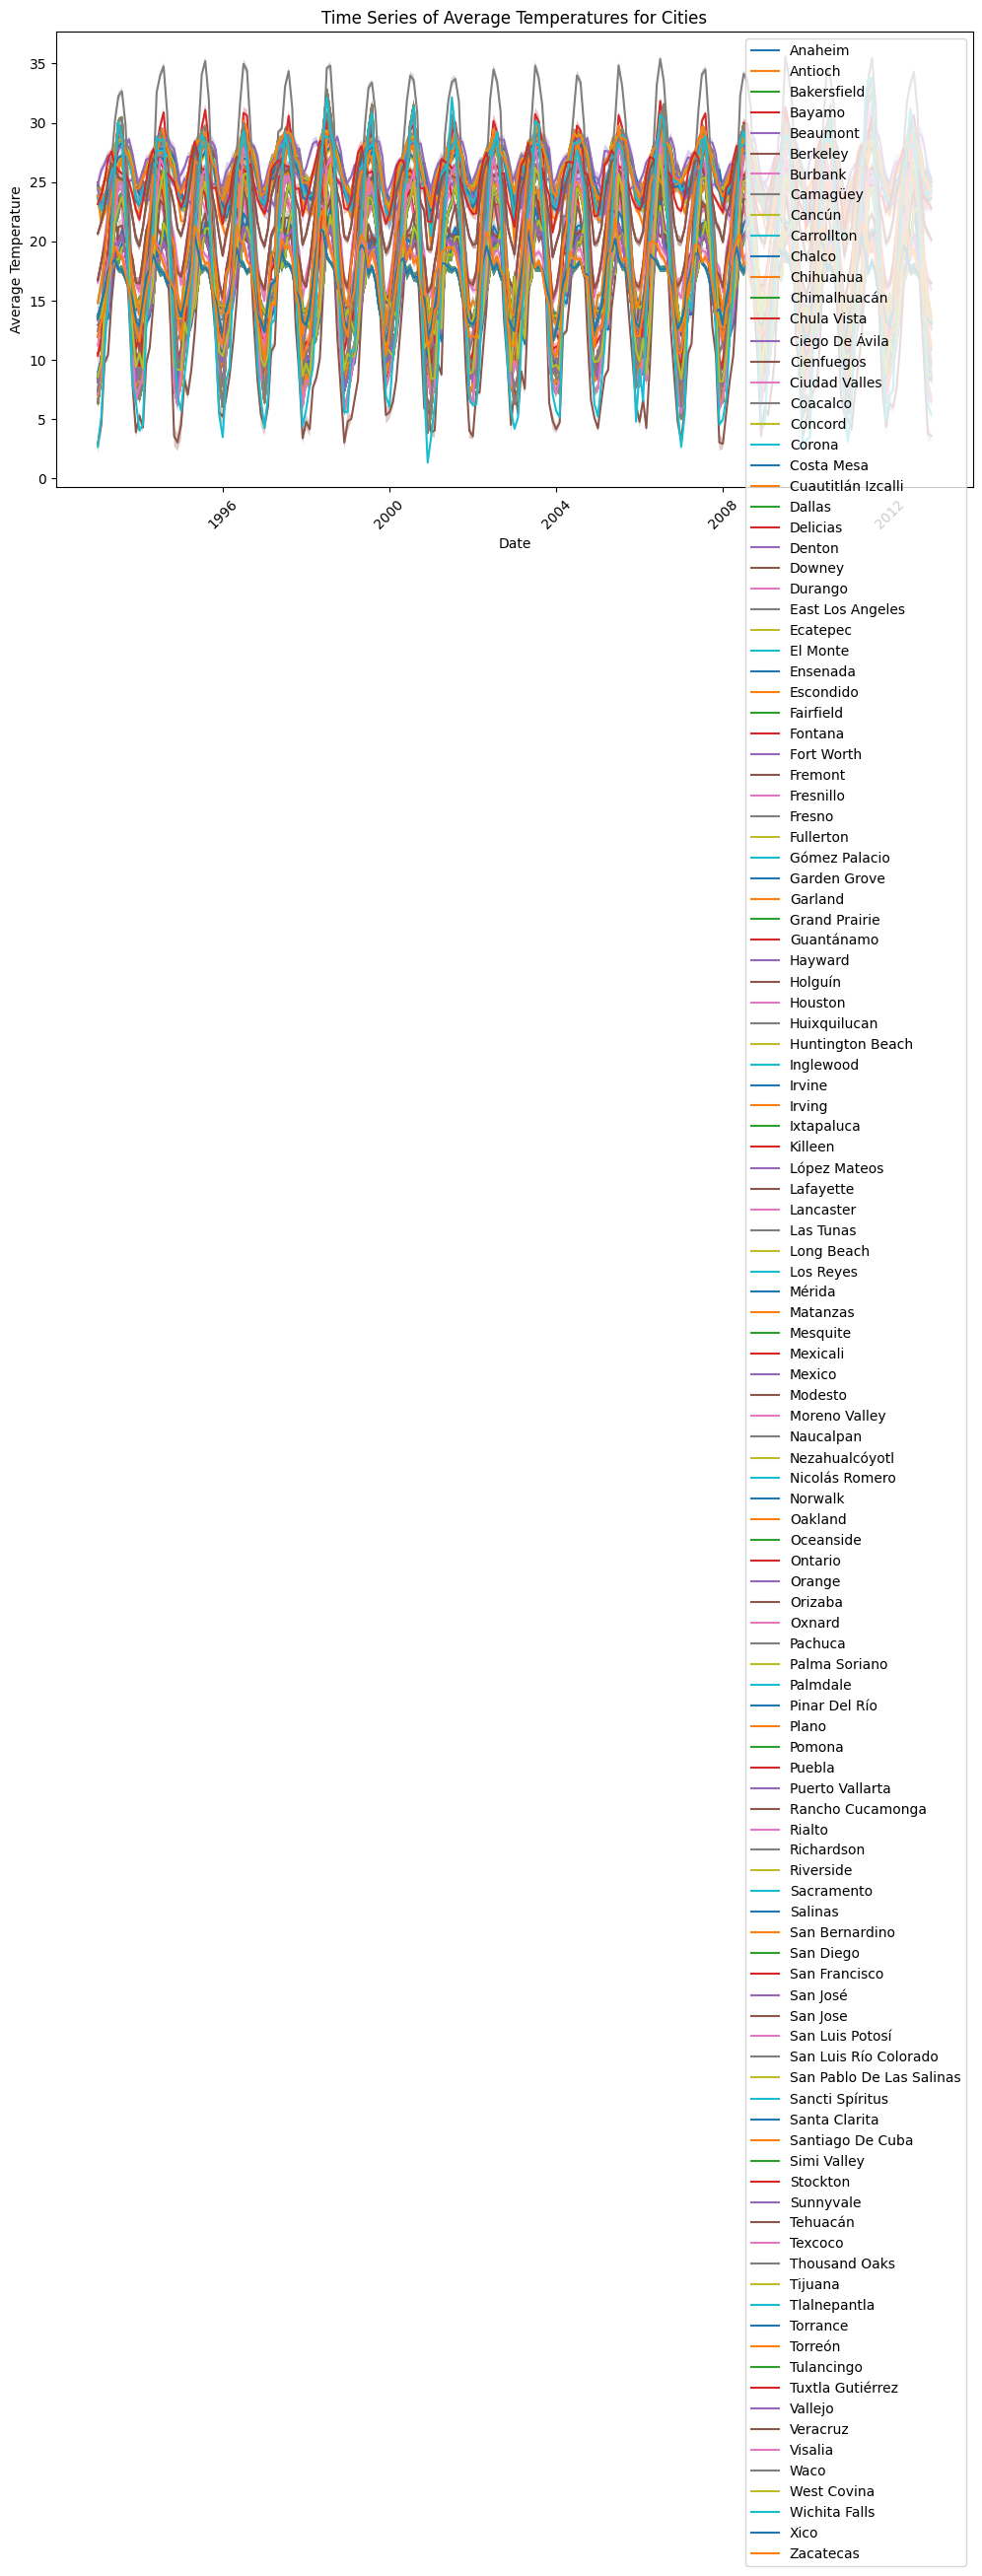

In [88]:
# prompt: Use matplotlib.pyplot to graph all the timeseries in df_filtered_graph in a single graph use your x-axis as dt and y-axis as AverageTemperature

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered_graph is already defined and contains 'dt' and 'AverageTemperature' columns.
# If not, replace with the actual column names.

# Convert 'dt' column to datetime objects if it's not already
df_filtered_graph['dt'] = pd.to_datetime(df_filtered_graph['dt'])

plt.figure(figsize=(12, 6))  # Adjust figure size as needed

for city in df_filtered_graph['City'].unique():
    city_data = df_filtered_graph[df_filtered_graph['City'] == city]
    plt.plot(city_data['dt'], city_data['AverageTemperature'], label=city)
    plt.fill_between(city_data['dt'], city_data['AverageTemperature'] - city_data['AverageTemperatureUncertainty'],
                     city_data['AverageTemperature'] + city_data['AverageTemperatureUncertainty'], alpha=0.3)

plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.title("Time Series of Average Temperatures for Cities")
plt.legend()  # Show legend
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


<ipython-input-89-07189e486a3a>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



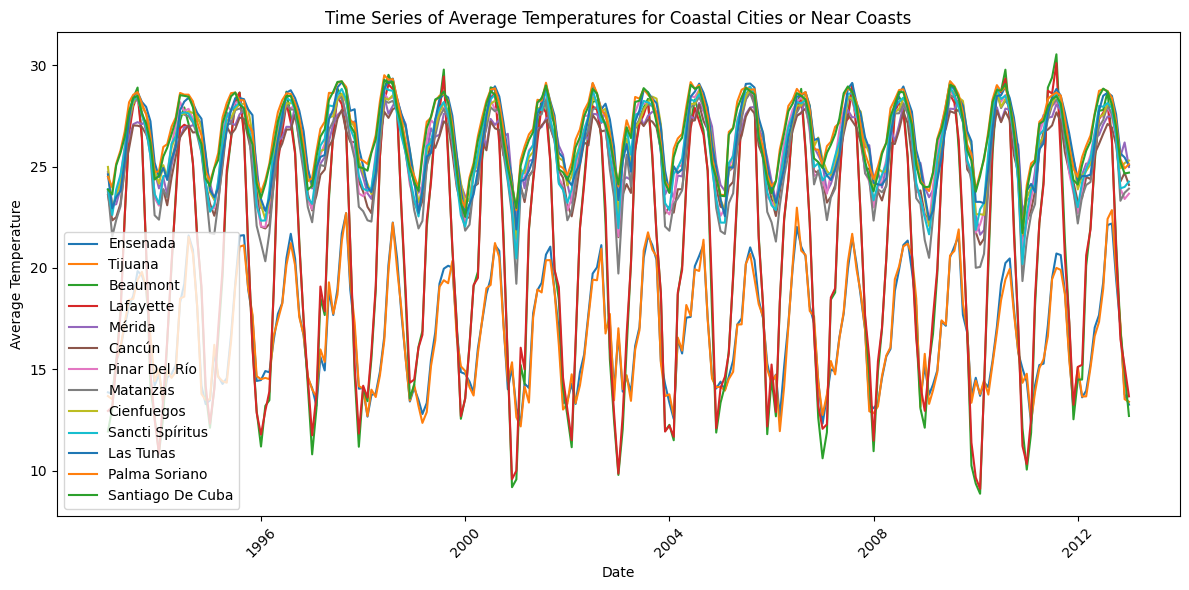

In [89]:
# prompt: Put the following in a list Ensenada, Tijuana, Beaumont, Lafayette, Mérida, Cancún, Pinar del Rio, Matanzas, Cienfuegos, Sancti Spiritus, Las Tunas, Palma Soriano, Santiago de Cuba and graph the time series for each of this cities

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered_graph is already defined from the previous code
# and contains 'dt', 'AverageTemperature', 'City', and 'AverageTemperatureUncertainty' columns.

cities_to_plot = ['Ensenada', 'Tijuana', 'Beaumont', 'Lafayette', 'Mérida', 'Cancún', 'Pinar Del Río',
                  'Matanzas', 'Cienfuegos', 'Sancti Spíritus', 'Las Tunas', 'Palma Soriano', 'Santiago De Cuba']

# Filter the DataFrame to include only the specified cities
df_selected_cities = df_filtered_graph[df_filtered_graph['City'].isin(cities_to_plot)]

# Convert 'dt' column to datetime objects if it's not already
df_selected_cities['dt'] = pd.to_datetime(df_selected_cities['dt'])


plt.figure(figsize=(12, 6))  # Adjust figure size as needed

for city in cities_to_plot:
    city_data = df_selected_cities[df_selected_cities['City'] == city]
    if not city_data.empty:  # Check if there's data for the city
      plt.plot(city_data['dt'], city_data['AverageTemperature'], label=city)
    else:
      print(f"No data found for city: {city}")

plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.title("Time Series of Average Temperatures for Coastal Cities or Near Coasts")
plt.legend()  # Show legend
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Se pueden ver a simple vista 3 diferentes de grupos que tienen tanto misma magnitud como similar periodicidad, que se esperan también encontrar en clusterizaciones de DBSCAN y KMeans

In [92]:
df_normalized = []
for i in (df_filtered_graph['City'].unique()):
  trial = df_filtered_constrained[df_filtered_constrained['City'] == i]
  df_normalized.append((trial[(trial['dt'] > '2003-01-01')]['AverageTemperature'].mean()-trial[(trial['dt'] <= '2003-01-01')]['AverageTemperature'].mean()) / trial[(trial['dt'] <= '2003-01-01')]['AverageTemperature'].mean())
df_normalized = pd.DataFrame(df_normalized)
df_normalized

,0
0,0.009688
1,0.002657
2,0.009072
3,0.001797
4,0.018648
...,...
117,0.024176
118,0.008041
119,0.028645
120,0.007462


## Analisis Estadístico

In [93]:

# Calculate statistics for each city
city_stats = df_filtered_constrained.groupby('City')['AverageTemperature'].agg(['var', 'mean', 'min', 'max', 'median', 'std'])

# Display the results
city_stats


,var,mean,min,max,median,std
City,,,,,,
Anaheim,7.613128,16.768282,11.954,22.973,16.621,2.759190
Antioch,17.106892,14.975834,7.291,22.465,14.974,4.136048
Bakersfield,48.113658,16.363183,5.541,28.745,15.631,6.936401
Bayamo,2.860389,26.792311,21.822,29.503,27.030,1.691269
Beaumont,38.644280,20.716000,8.869,30.533,21.096,6.216452
...,...,...,...,...,...,...
Waco,56.199573,19.241950,5.614,32.657,19.410,7.496637
West Covina,31.697228,16.474274,8.196,27.336,15.729,5.630029
Wichita Falls,80.534040,17.191050,1.343,33.778,17.125,8.974076


Como se puede ver con análisis estadístico es muchas veces díficil hacer una distinción entre las series de tiempo

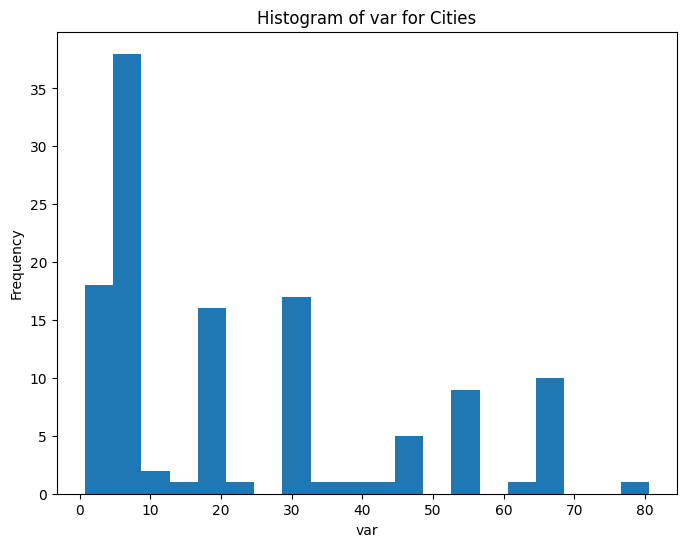

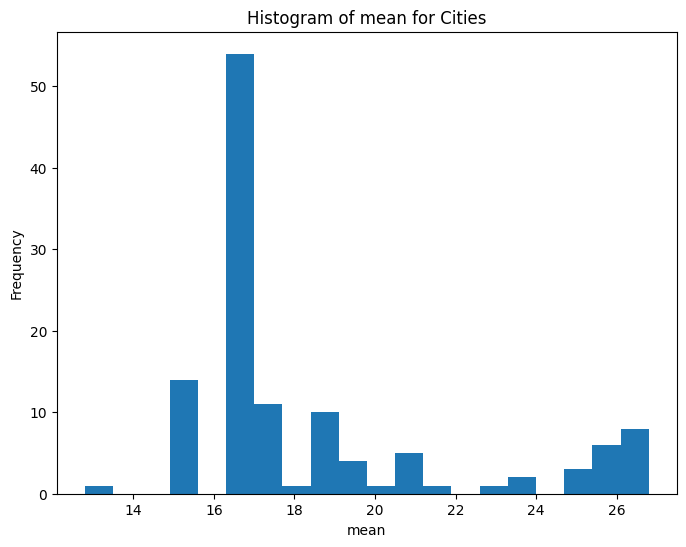

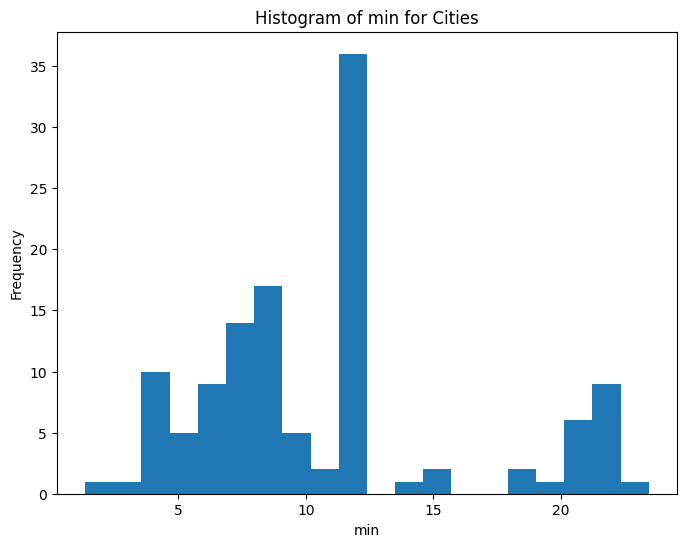

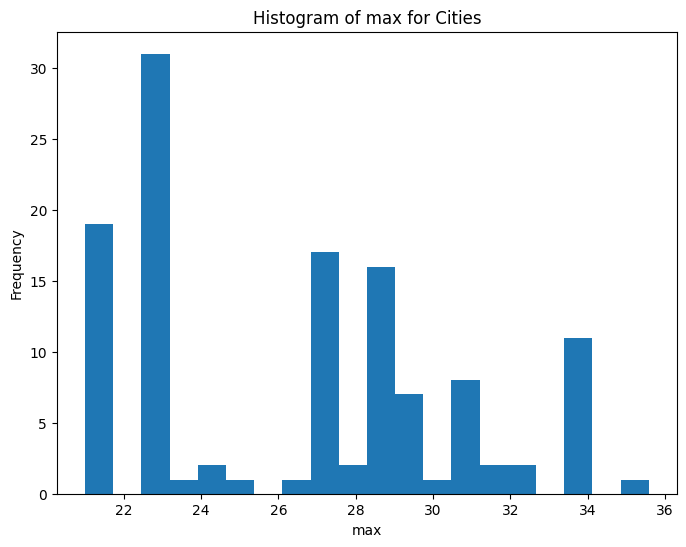

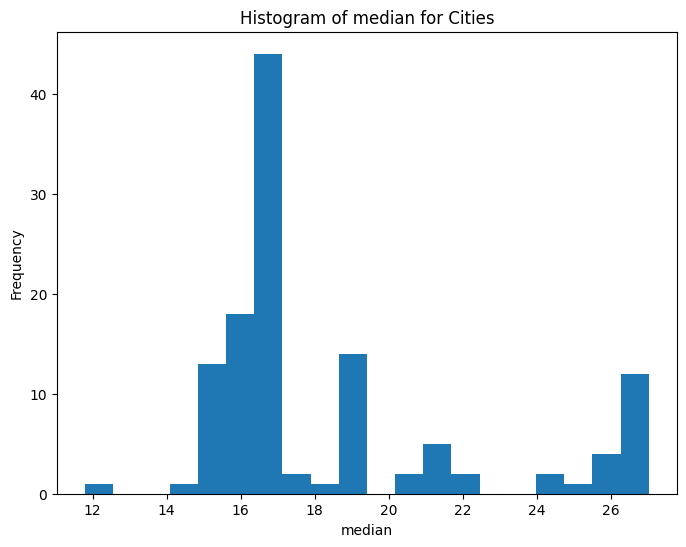

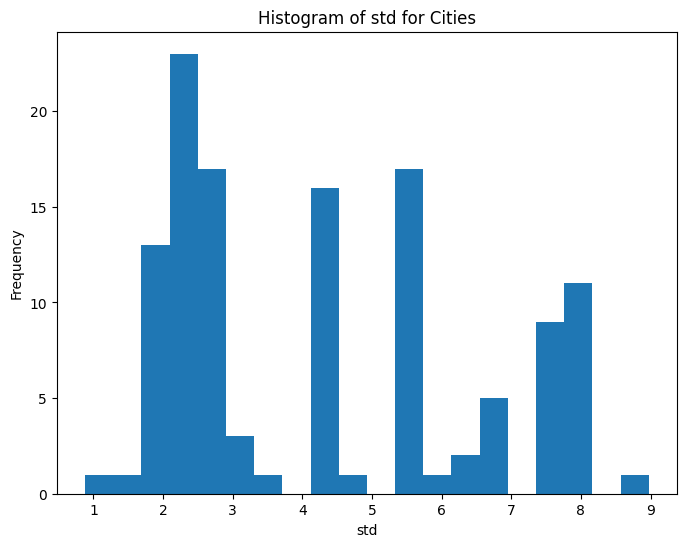

In [94]:

import matplotlib.pyplot as plt

# Create a histogram for each metric
metrics = ['var', 'mean', 'min', 'max', 'median', 'std']
for metric in metrics:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.hist(city_stats[metric], bins=20)  # Adjust the number of bins as needed
    plt.xlabel(metric)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {metric} for Cities")
    plt.show()


SIendo que no se ve una distribución clara en ninguna de las métricas, se  puede notar un tanto díficil separar series de tiempo en base a estas métricas mediante métodos estadísticos tradicionales.

# Análisis TDA + ML

In [17]:
!pip install kmapper
!pip install umap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3541 sha256=8f59168db51ae2149b0fc9c6bc5685e8676a7f72c1affe45190cb01fe2cb5408
  Stored in directory: /root/.cache/pip/wheels/82/d8/73/e9eb3334baaad795ff0278363ff1aca7568bdf2793e452a527
Successfully built umap


## Mapper

In [18]:
import kmapper as km
import umap.umap_ as umap
import sklearn.manifold as manifold
from sklearn import preprocessing
N_components_iso = 40
N_components_umap = 2
n_cubes = 15
overlap = 0.3
covering=km.Cover(n_cubes=n_cubes,perc_overlap=overlap)

mapper = km.KeplerMapper(verbose=1)
projected_X = mapper.fit_transform(df_normalized,
    projection=[
        manifold.Isomap(n_components=N_components_iso,),
        umap.UMAP(n_components=N_components_umap,random_state = 1)
    ]
)


KeplerMapper(verbose=1)
..Composing projection pipeline of length 2:
	Projections: Isomap(n_components=40)
		UMAP(random_state=1)
	Distance matrices: False
False
	Scalers: MinMaxScaler()
MinMaxScaler()
..Projecting on data shaped (122, 1)

..Projecting data using: 
	Isomap(n_components=40)


..Scaling with: MinMaxScaler()

..Projecting on data shaped (122, 40)

..Projecting data using: 
	UMAP(random_state=1, verbose=1)

UMAP(n_jobs=1, random_state=1, verbose=1)
Thu May  1 14:42:17 2025 Construct fuzzy simplicial set


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_isomap.py:384: UserWarning:

The number of connected components of the neighbors graph is 5 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.

/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil and dok are m

Thu May  1 14:42:17 2025 Finding Nearest Neighbors
Thu May  1 14:42:21 2025 Finished Nearest Neighbor Search
Thu May  1 14:42:24 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu May  1 14:42:26 2025 Finished embedding

..Scaling with: MinMaxScaler()



## DBSCAN

In [40]:
import sklearn.cluster as cluster
import numpy as np

num_samples = 10
#Se disminuye la cantidad de puntos necesarios en un punto para aumentar cantidad de nodos
num_samples = 5
eps = 0.5
#Se aumenta la distancia mínima de vecinos para aumentar
eps = 1

graph_DBSCAN = mapper.map(projected_X, df_normalized, clusterer=cluster.DBSCAN(metric="cosine",min_samples = num_samples, eps = eps), cover = covering)#Cubic spline numbers. Siendo que son como 120 ciudades se pone un minimo de 10 para tener 12 o menos grupos.
mapper.visualize(graph_DBSCAN, title = f'Mapper of Average Temperature in cities with DBSCAN: Isomap Param.: {N_components_iso} UMAP Param.:{N_components_umap}', color_function_name = 'Sum', node_color_function = np.array(['average','std','sum','min','max']), path_html = f'DBSCAN - min samp = {num_samples}, eps = {eps}; Cover : cubes = {covering.n_cubes},Overlap = {covering.perc_overlap},  Isomap Param.: {N_components_iso} UMAP Param.:{N_components_umap}.html')
# Se intenta con 0.1 pero no se encuentra buenos resultados

Mapping on data shaped (122, 1) using lens shaped (122, 2)

Creating 225 hypercubes.

Created 10 edges and 13 nodes in 0:00:00.033098.
Wrote visualization to: DBSCAN - min samp = 5, eps = 1; Cover : cubes = 15,Overlap = 0.3,  Isomap Param.: 40 UMAP Param.:2.html


/usr/local/lib/python3.11/dist-packages/kmapper/kmapper.py:872: UserWarning:

`color_function_name` was set -- however, no `color_values` were passed, so default color_values were computed based on row order, and the passed `color_function_name` will be set as their label. This may be unexpected.

/usr/local/lib/python3.11/dist-packages/kmapper/visuals.py:344: RuntimeWarning:

invalid value encountered in scalar divide

/usr/local/lib/python3.11/dist-packages/kmapper/visuals.py:345: RuntimeWarning:

invalid value encountered in scalar divide



'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Mapper of Average Temperature in cities with DBSCAN: Isomap Param.: 40 UMAP Param.:2 | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  

## KMEANS

### Silhouette Score Para K Óptimo

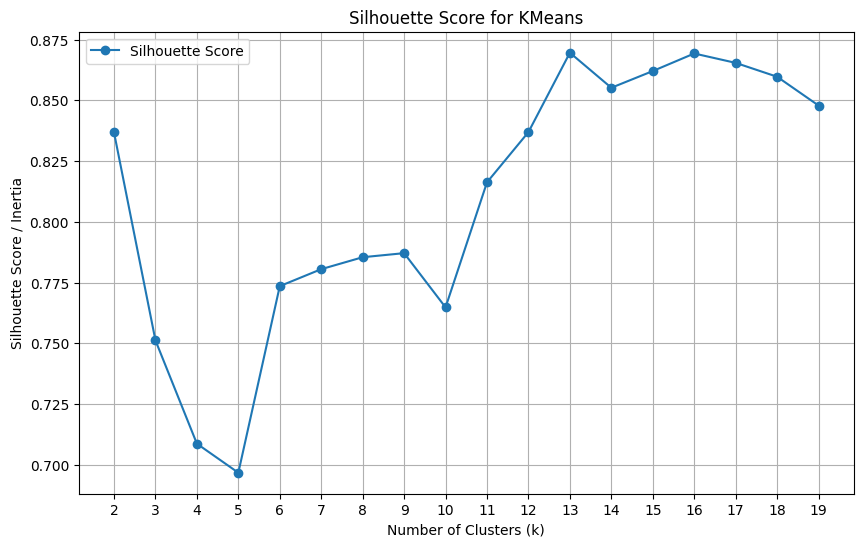

Optimal k: 13 with a Silhouette score of: 0.8696


In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Assuming df_normalized is your data
X = df_normalized.values

# Calculate Silhouette Score for different values of k
range_n_clusters = range(2, 20) # Test k from 2 to 9
silhouette_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)


# Plot Silhouette Score in the same graph
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', label='Silhouette Score')

plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score / Inertia")
plt.title("Silhouette Score for KMeans")
plt.xticks(range_n_clusters) # Ensure all k values are shown on x-axis
plt.legend()
plt.grid(True)
plt.show()

k_optimal = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal k: {k_optimal} with a Silhouette score of: {round(max(silhouette_scores),4)}")

Se puede observar que el k optimo esta en k = 13, sin embargo, por la gráfica de silhouette score que normalmente tiene ascenso rapido en las primeras iteraciones de k, se puede

### Gráfica de Codo Para K Óptimo

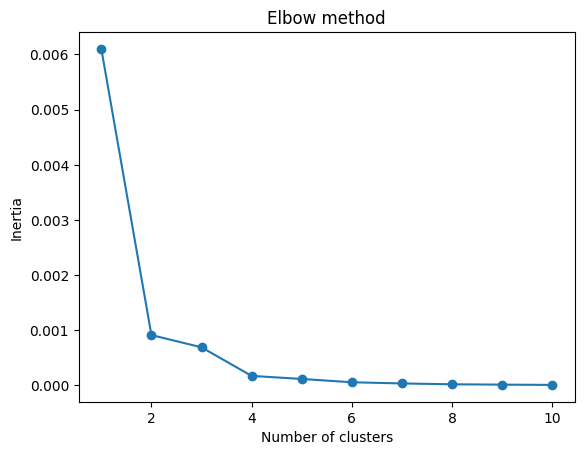

In [42]:
# prompt: Do elbow method for k means optimization and silhouette score

import matplotlib.pyplot as plt
# Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
#Viendose la grafica se puede concluir que 4 es uno de los posibles K's que pueda ser mejor para el problema
k_optimal = 4

In [43]:
import sklearn.cluster as cluster
import numpy as np
graph_KMeans = mapper.map(projected_X, df_normalized, clusterer=cluster.KMeans(n_clusters = k_optimal,random_state=0), cover=covering)
mapper.visualize(graph_KMeans, title = f'Mapper of Average Temperature in cities with KMeans k={k_optimal}: Isomap Param.: {N_components_iso} UMAP Param.:{N_components_umap}', color_function_name = 'Sum', node_color_function = np.array(['average','std','sum','min','max']),path_html = f'KMeans k={k_optimal};  Cover : cubes = {covering.n_cubes},Overlap = {covering.perc_overlap}, Isomap Param.: {N_components_iso} UMAP Param.:{N_components_umap}.html')
#Lo hace demasiado segmentado con k = 13, se intenta entonces con k = 4.

Mapping on data shaped (122, 1) using lens shaped (122, 2)

Creating 225 hypercubes.

Created 35 edges and 43 nodes in 0:00:00.040701.


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning:

Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning:

Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning:

Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning:

Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.

/usr/local/lib/python3.11/dist-packages/sklearn/ba

Wrote visualization to: KMeans k=4;  Cover : cubes = 15,Overlap = 0.3, Isomap Param.: 40 UMAP Param.:2.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Mapper of Average Temperature in cities with KMeans k=4: Isomap Param.: 40 UMAP Param.:2 | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;

En la proyección hecha por KMeans se ve como es que los datos clusterss cuando se tratan con un overlap de 0.1 - 0.25 y con n_cubes default(= 10) se tiene bastantes diferentes nodos. Se terminó usando un k = 4 y un overlap de 0.3 con n_cubes =  15, el cual permite ver ciertas aglomeraciones de clusters.

## Análisis de Clusterización

### DBSCAN

Unicos que no tienen links son los cubos 3 y 4

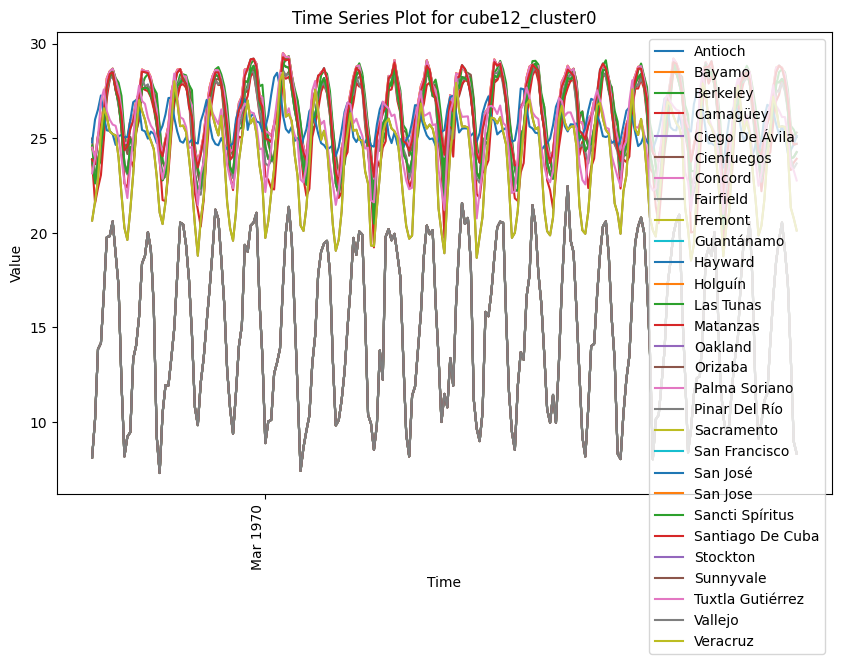

In [119]:
plt.figure(figsize=(10, 6))
cube_name = 'cube12_cluster0'

for i in range(len(graph_DBSCAN['nodes'][cube_name])):

    label = list(df_filtered_constrained['City'].unique())[graph_DBSCAN['nodes'][cube_name][i]]
    city_time_series = df_filtered_constrained[df_filtered_constrained['City'] == label]
    plt.plot(city_time_series['dt'],city_time_series['AverageTemperature'],label = label)
import matplotlib.dates as mdates
mdates.DateFormatter('%b %Y')  # e.g., Jan 2021

# Tick every 4 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval = 12))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# Rotate ticks for clarity
plt.xticks(rotation=90, ha='right')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title(f"Time Series Plot for {cube_name}")
plt.legend()
plt.show()

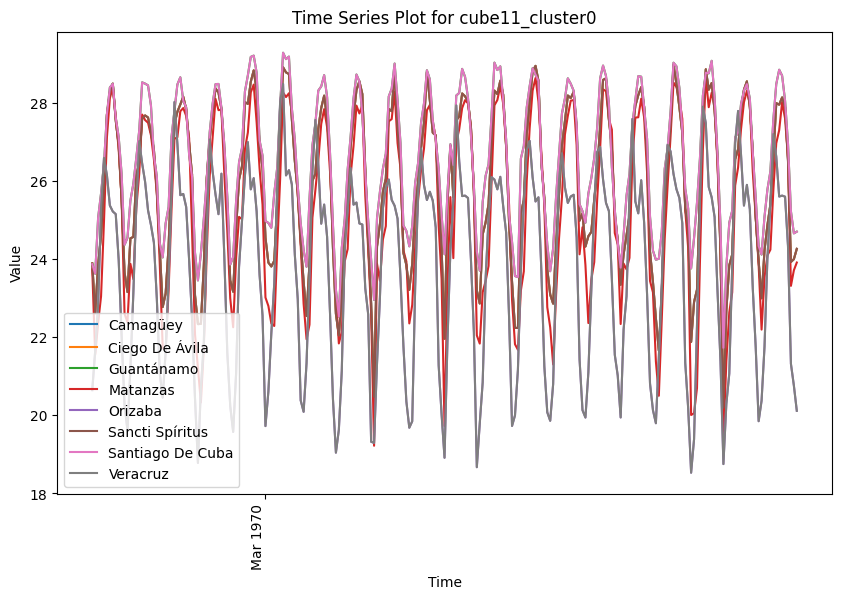

In [120]:
plt.figure(figsize=(10, 6))
cube_name = 'cube11_cluster0'

for i in range(len(graph_DBSCAN['nodes'][cube_name])):

    label = list(df_filtered_constrained['City'].unique())[graph_DBSCAN['nodes'][cube_name][i]]
    city_time_series = df_filtered_constrained[df_filtered_constrained['City'] == label]
    plt.plot(city_time_series['dt'],city_time_series['AverageTemperature'],label = label)
import matplotlib.dates as mdates
mdates.DateFormatter('%b %Y')  # e.g., Jan 2021

# Tick every 4 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval = 12))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# Rotate ticks for clarity
plt.xticks(rotation=90, ha='right')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title(f"Time Series Plot for {cube_name}")
plt.legend()
plt.show()

### KMeans

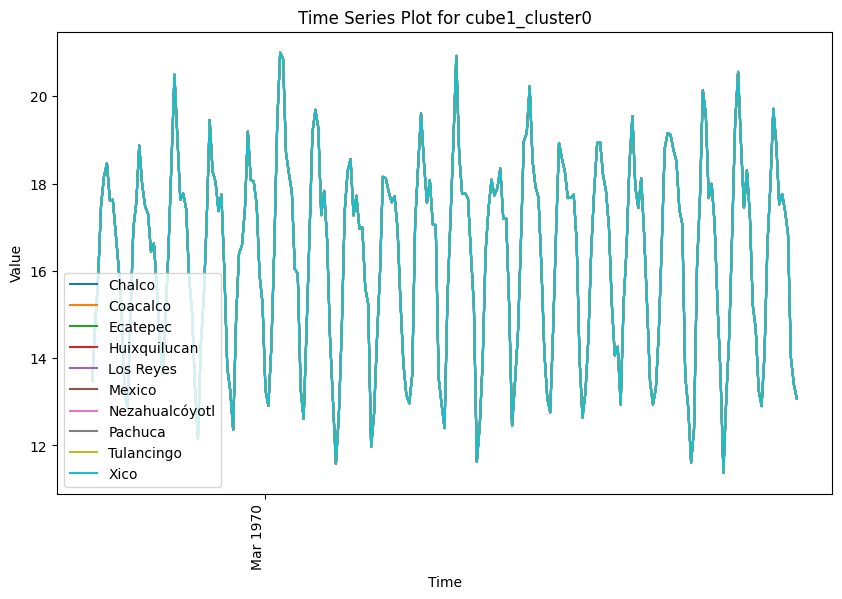

In [115]:
plt.figure(figsize=(10, 6))
cube_name = 'cube1_cluster0'

for i in range(len(graph_KMeans['nodes'][cube_name])):

    label = list(df_filtered_constrained['City'].unique())[graph_KMeans['nodes'][cube_name][i]]
    city_time_series = df_filtered_constrained[df_filtered_constrained['City'] == label]
    plt.plot(city_time_series['dt'],city_time_series['AverageTemperature'],label = label)
import matplotlib.dates as mdates
mdates.DateFormatter('%b %Y')  # e.g., Jan 2021

# Tick every 4 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval = 12))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# Rotate ticks for clarity
plt.xticks(rotation=90, ha='right')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title(f"Time Series Plot for {cube_name}")
plt.legend()
plt.show()

Se podría decir que es mejor segmentand

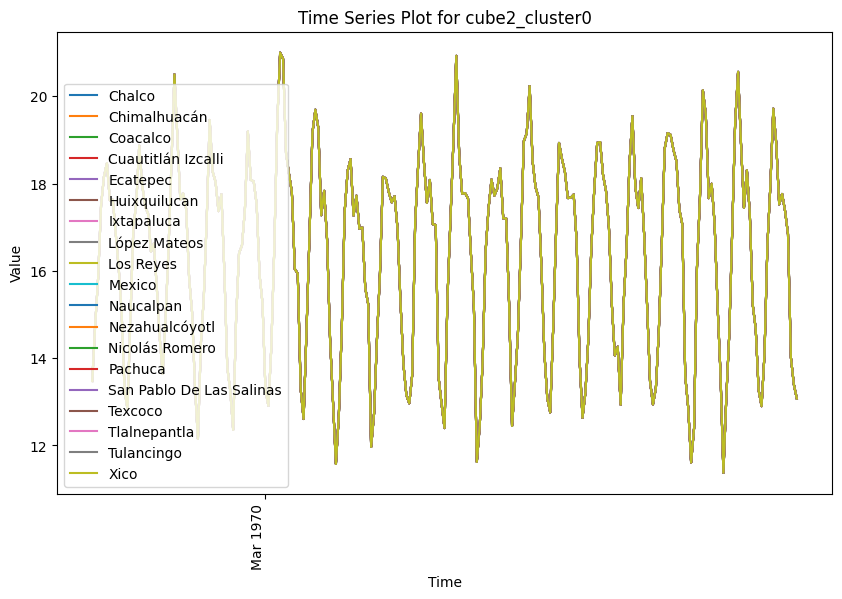

In [116]:
plt.figure(figsize=(10, 6))
cube_name = 'cube2_cluster0'

for i in range(len(graph_KMeans['nodes'][cube_name])):

    label = list(df_filtered_constrained['City'].unique())[graph_KMeans['nodes'][cube_name][i]]
    city_time_series = df_filtered_constrained[df_filtered_constrained['City'] == label]
    plt.plot(city_time_series['dt'],city_time_series['AverageTemperature'],label = label)
import matplotlib.dates as mdates
mdates.DateFormatter('%b %Y')  # e.g., Jan 2021

# Tick every 4 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval = 12))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# Rotate ticks for clarity
plt.xticks(rotation=90, ha='right')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title(f"Time Series Plot for {cube_name}")
plt.legend()
plt.show()